


# Импортируем нужные библиотеки

In [221]:
import pandas as pd
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy import stats
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import pingouin as pg
from tqdm.auto import tqdm
import numpy as np

# Считаем данные

In [222]:
df = 'Проект_3_users_test.csv'
df2 = 'Проект_3_users_control_1.csv'
df3 = 'Проект_3_users_control_2.csv'
df4 = 'Проект_3_transactions_test.csv'
df5 = 'Проект_3_transactions_control_1.csv'
df6 = 'Проект_3_transactions_control_2.csv'

In [223]:
users_test = pd.read_csv(df, sep=';')
users_control_1 = pd.read_csv(df2,sep=';')
users_control_2 = pd.read_csv(df3,sep=';')
transactions_test = pd.read_csv(df4,sep=';')
transactions_control_1 = pd.read_csv(df5,sep=';')
transactions_control_2 = pd.read_csv(df6,sep=';')

# Цель: повысить выручку за счет изменения стоимости премиум-подписки при покупке через две новые платежные системы для пользователей из нескольких стран. 

# Метрики :  
### 1.Средняя выручка на одного пользователя ( ARPPU )
### 2.Удержание пользователей ( Retention ) 
### 3.CR


# Формулируем гипотезы:
### H0 - изменение стоимости премиум подписки не повлияет на увелечение прибыли 
### H1 - изменение стоиомсти премиум подписки повлияет на увелечение прибыли 

# Проведем подготовку и анализ наших df's

# 1.1.Тестовая группа

In [224]:
users_test.info()
users_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB


,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [225]:
users_test.shape

(4308, 13)

In [226]:
users_test.nunique() # Все пользователи уникальны

uid                 4308
age                   57
attraction_coeff     600
coins                 28
country               51
visit_days           891
gender                 2
age_filter_start      51
age_filter_end        78
views_count          331
was_premium            1
is_premium             1
total_revenue        105
dtype: int64

In [227]:
users_test.isna().sum() # Имеем большое кол-во пропусков в Coins, visit_days, was и is premium

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [228]:
users_test.fillna(0, inplace=True) # Заменим все пустые значения на 0

In [229]:
users_test = users_test.drop_duplicates() # Удалим дубликаты

In [230]:
users_test['group'] = 'test' # колонка с названием группы
users_test

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0,test
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0.0,0.0,0,test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0,test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0,test
4,891406035,27,1000,0.0,France,0,1,24,30,1,1.0,0.0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,891078639,17,895,0.0,United States of America,"1,2,3,4,5",1,16,20,96,0.0,0.0,0,test
4304,891188733,27,866,0.0,United States of America,"1,2,3",1,18,41,30,0.0,0.0,0,test
4305,891293718,48,0,0.0,Argentina,0,1,47,51,10,0.0,0.0,0,test
4306,891192357,32,0,0.0,Australia,0,1,16,49,0,0.0,0.0,0,test


# 1.2.Тестовая группа

In [231]:
transactions_test

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium
...,...,...,...,...,...,...,...,...
268,891419625,Israel,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,trial_vip_popup,trial_premium
269,891447105,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial
270,891497073,United States of America,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,empty_likes,other_type
271,891406224,Israel,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,empty_likes,other_type


In [232]:
transactions_test.shape

(273, 8)

In [233]:
transactions_test['joined_at'] = pd.to_datetime(transactions_test['joined_at']) # Преобразовали формат колонок
transactions_test['paid_at'] = pd.to_datetime(transactions_test['paid_at'])

In [234]:
transactions_test.info() # NaN значения отуствуют 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           273 non-null    int64         
 1   country       273 non-null    object        
 2   joined_at     273 non-null    datetime64[ns]
 3   paid_at       273 non-null    datetime64[ns]
 4   revenue       273 non-null    int64         
 5   payment_id    273 non-null    int64         
 6   from_page     273 non-null    object        
 7   product_type  273 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 17.2+ KB


In [235]:
transactions_test.nunique() # Не все пользователи уникальны 

uid             146
country          17
joined_at       146
paid_at         258
revenue         125
payment_id        6
from_page        22
product_type      4
dtype: int64

In [236]:
transactions_test = transactions_test.drop_duplicates() # Удалили дубликаты
transactions_test

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium
...,...,...,...,...,...,...,...,...
268,891419625,Israel,2017-04-11 05:58:00,2017-11-11 08:33:00,14352,147,trial_vip_popup,trial_premium
269,891447105,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial
270,891497073,United States of America,2017-02-11 15:33:00,2017-05-11 04:06:00,2730,67,empty_likes,other_type
271,891406224,Israel,2017-04-11 12:56:00,2017-04-11 13:35:00,2743,67,empty_likes,other_type


# 2.1. Контрольная группа №1

In [237]:
users_control_1

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,892022304,26,227,NaN,United States of America,NaN,0,23,29,427,NaN,NaN,0
4336,891905022,38,200,NaN,Argentina,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,NaN,NaN,0
4337,891304722,49,411,NaN,United States of America,1,1,46,52,17,NaN,NaN,0
4338,891302328,27,0,NaN,United States of America,"1,3,5",1,24,30,0,NaN,NaN,0


In [238]:
users_control_1.shape

(4340, 13)

In [239]:
users_control_1.nunique() # Все пользователи уникальны

uid                 4340
age                   56
attraction_coeff     587
coins                 22
country               40
visit_days           880
gender                 2
age_filter_start      53
age_filter_end        78
views_count          339
was_premium            1
is_premium             1
total_revenue        128
dtype: int64

In [240]:
users_control_1.isna().sum() # Видим большое кол-во пропущенных значений

uid                    0
age                    0
attraction_coeff       0
coins               4280
country                0
visit_days          1324
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3904
is_premium          4148
total_revenue          0
dtype: int64

In [241]:
users_control_1.fillna(0, inplace=True) # Заменим все пустые значения на 0

In [242]:
users_control_1 = users_control_1.drop_duplicates()
users_control_1

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,0.0,United States of America,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0
1,891248523,29,500,0.0,United States of America,"1,2",1,26,32,12,0.0,0.0,0
2,891670932,33,800,0.0,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0
3,891060786,26,0,0.0,Argentina,"1,2,3,4,5",1,23,29,0,0.0,0.0,0
4,892006554,35,294,0.0,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,892022304,26,227,0.0,United States of America,0,0,23,29,427,0.0,0.0,0
4336,891905022,38,200,0.0,Argentina,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,0.0,0.0,0
4337,891304722,49,411,0.0,United States of America,1,1,46,52,17,0.0,0.0,0
4338,891302328,27,0,0.0,United States of America,"1,3,5",1,24,30,0,0.0,0.0,0


In [243]:
users_control_1['group'] = 'control1' # колонка с названием группы
users_control_1

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892319115,25,435,0.0,United States of America,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0,control1
1,891248523,29,500,0.0,United States of America,"1,2",1,26,32,12,0.0,0.0,0,control1
2,891670932,33,800,0.0,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0,control1
3,891060786,26,0,0.0,Argentina,"1,2,3,4,5",1,23,29,0,0.0,0.0,0,control1
4,892006554,35,294,0.0,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0,control1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,892022304,26,227,0.0,United States of America,0,0,23,29,427,0.0,0.0,0,control1
4336,891905022,38,200,0.0,Argentina,"1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,21",1,20,50,5,0.0,0.0,0,control1
4337,891304722,49,411,0.0,United States of America,1,1,46,52,17,0.0,0.0,0,control1
4338,891302328,27,0,0.0,United States of America,"1,3,5",1,24,30,0,0.0,0.0,0,control1


# 2.2 Контрольная группа №1

In [244]:
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [245]:
transactions_control_1.shape

(1007, 8)

In [246]:
transactions_control_1.nunique()

uid             193
country          18
joined_at       194
paid_at         336
revenue         127
payment_id        7
from_page        25
product_type      4
dtype: int64

In [247]:
transactions_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_id    377 non-null    float64
 6   from_page     377 non-null    object 
 7   product_type  377 non-null    object 
dtypes: float64(3), object(5)
memory usage: 63.1+ KB


In [248]:
transactions_control_1.isna().sum()

uid             630
country         630
joined_at         0
paid_at           0
revenue         630
payment_id      630
from_page       630
product_type    630
dtype: int64

In [249]:
transactions_control_1 = transactions_control_1.dropna() # Удаляем пустышки
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
372,891556971.0,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886.0,68.0,none,premium_no_trial
373,892052106.0,Spain,2017-10-22 01:38:00,2017-10-29 03:44:00,12883.0,147.0,trial_vip_popup,trial_premium
374,892145004.0,Chile,2017-10-20 04:25:00,2017-01-11 02:56:00,9919.0,147.0,trial_vip_popup,trial_premium
375,891458229.0,Spain,2017-03-11 12:12:00,2017-04-11 03:43:00,6305.0,19.0,menu,coins


In [250]:
transactions_control_1.nunique() # Не все пользователи уникальны

uid             193
country          18
joined_at       193
paid_at         335
revenue         127
payment_id        7
from_page        25
product_type      4
dtype: int64

In [251]:
transactions_control_1 = transactions_control_1.drop_duplicates() # Удаляем дубликаты
transactions_control_1

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins
...,...,...,...,...,...,...,...,...
372,891556971.0,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886.0,68.0,none,premium_no_trial
373,892052106.0,Spain,2017-10-22 01:38:00,2017-10-29 03:44:00,12883.0,147.0,trial_vip_popup,trial_premium
374,892145004.0,Chile,2017-10-20 04:25:00,2017-01-11 02:56:00,9919.0,147.0,trial_vip_popup,trial_premium
375,891458229.0,Spain,2017-03-11 12:12:00,2017-04-11 03:43:00,6305.0,19.0,menu,coins


In [252]:
transactions_control_1['joined_at'] = pd.to_datetime(transactions_control_1['joined_at']) # Преобразовали формат колонок
transactions_control_1['paid_at'] = pd.to_datetime(transactions_control_1['paid_at'])

# 3.1 Контрольная группа №2

In [253]:
users_control_2

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,891937401,63,242,NaN,Italy,"1,2",1,50,66,33,NaN,NaN,0
4260,891692844,35,500,NaN,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,NaN,NaN,0
4261,891096429,41,333,NaN,United States of America,NaN,1,38,44,6,NaN,NaN,0
4262,891697584,48,210,NaN,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,NaN,NaN,0


In [254]:
users_control_2.shape

(4264, 13)

In [255]:
users_control_2.nunique() # Все уникально

uid                 4264
age                   59
attraction_coeff     585
coins                 23
country               45
visit_days           837
gender                 2
age_filter_start      56
age_filter_end        79
views_count          328
was_premium            1
is_premium             1
total_revenue        128
dtype: int64

In [256]:
users_control_2.isna().sum() # Множество пропущенных значений

uid                    0
age                    0
attraction_coeff       0
coins               4203
country                0
visit_days          1364
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3853
is_premium          4073
total_revenue          0
dtype: int64

In [257]:
users_control_2.fillna(0, inplace=True) # Заменим все пустые значения на 0

In [258]:
users_control_2['group'] = 'control2' # колонка с названием группы
users_control_2

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892035504,37,137,0.0,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,0.0,0.0,0,control2
1,891782112,57,0,0.0,Italy,1,1,54,60,0,0.0,0.0,0,control2
2,891110337,30,769,0.0,France,"1,2,3,4,5",1,27,33,13,0.0,0.0,0,control2
3,891796320,48,750,0.0,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,0.0,0.0,0,control2
4,891880212,54,638,0.0,United States of America,1,1,35,53,94,0.0,0.0,0,control2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0.0,0,control2
4260,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0.0,0,control2
4261,891096429,41,333,0.0,United States of America,0,1,38,44,6,0.0,0.0,0,control2
4262,891697584,48,210,0.0,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,0.0,0.0,0,control2


# 3.2. Контрольная группа №2

In [259]:
transactions_control_2

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial
...,...,...,...,...,...,...,...,...
323,891985866,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640,147,trial_vip_popup,trial_premium
324,891491145,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727,147,send_message,trial_premium
325,892053750,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261,19,autorefill,coins
326,891668253,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997,147,trial_vip_popup,trial_premium


In [260]:
transactions_control_2.shape

(328, 8)

In [261]:
transactions_control_2['joined_at'] = pd.to_datetime(transactions_control_2['joined_at']) # Преобразовали формат колонок
transactions_control_2['paid_at'] = pd.to_datetime(transactions_control_2['paid_at'])

In [262]:
transactions_control_2.nunique() # Не все уникальны

uid             187
country          19
joined_at       187
paid_at         309
revenue         123
payment_id        6
from_page        18
product_type      4
dtype: int64

In [263]:
transactions_control_2.info() # Все чисто!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           328 non-null    int64         
 1   country       328 non-null    object        
 2   joined_at     328 non-null    datetime64[ns]
 3   paid_at       328 non-null    datetime64[ns]
 4   revenue       328 non-null    int64         
 5   payment_id    328 non-null    int64         
 6   from_page     328 non-null    object        
 7   product_type  328 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 20.6+ KB


In [264]:
transactions_control_2.shape

(328, 8)

In [265]:
transactions_control_2 = transactions_control_2.drop_duplicates() # Удаляем дубликаты
transactions_control_2

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial
...,...,...,...,...,...,...,...,...
323,891985866,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640,147,trial_vip_popup,trial_premium
324,891491145,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727,147,send_message,trial_premium
325,892053750,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261,19,autorefill,coins
326,891668253,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997,147,trial_vip_popup,trial_premium


# Сделаем объединение всех пользователей 

In [266]:
users = pd.concat([users_test, users_control_1, users_control_2], ignore_index=True)
users.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0,test
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0.0,0.0,0,test
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0,test
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0,test
4,891406035,27,1000,0.0,France,0,1,24,30,1,1.0,0.0,0,test


# Сделаем объединение всех транзакций 

In [267]:
transactions = pd.concat([transactions_test, transactions_control_1, transactions_control_2], ignore_index=True)
transactions.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium


# Формируем один большой датасет 

In [268]:
MrBoss = users.merge(transactions, how='left', on=['uid', 'country'])
MrBoss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13331 entries, 0 to 13330
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               13331 non-null  int64         
 1   age               13331 non-null  int64         
 2   attraction_coeff  13331 non-null  int64         
 3   coins             13331 non-null  float64       
 4   country           13331 non-null  object        
 5   visit_days        13331 non-null  object        
 6   gender            13331 non-null  int64         
 7   age_filter_start  13331 non-null  int64         
 8   age_filter_end    13331 non-null  int64         
 9   views_count       13331 non-null  int64         
 10  was_premium       13331 non-null  float64       
 11  is_premium        13331 non-null  float64       
 12  total_revenue     13331 non-null  int64         
 13  group             13331 non-null  object        
 14  joined_at         945 

# Проанализируем датасет на наличие ошибок

In [269]:
no_revenue = MrBoss.query('total_revenue == 0 & is_premium == 1')

In [270]:
MrBoss.info()
transactions.shape
# видно что ровно все транзакции присоединились к данным

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13331 entries, 0 to 13330
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               13331 non-null  int64         
 1   age               13331 non-null  int64         
 2   attraction_coeff  13331 non-null  int64         
 3   coins             13331 non-null  float64       
 4   country           13331 non-null  object        
 5   visit_days        13331 non-null  object        
 6   gender            13331 non-null  int64         
 7   age_filter_start  13331 non-null  int64         
 8   age_filter_end    13331 non-null  int64         
 9   views_count       13331 non-null  int64         
 10  was_premium       13331 non-null  float64       
 11  is_premium        13331 non-null  float64       
 12  total_revenue     13331 non-null  int64         
 13  group             13331 non-null  object        
 14  joined_at         945 

(945, 8)

In [271]:
no_revenue.groupby('group', as_index=False)\
.agg({'uid': 'nunique'}) # Пользователи у которых есть премиум , но нет данных о выручки

,group,uid
0,control1,35
1,control2,42
2,test,34


In [272]:
reg_before_pay = MrBoss.query('joined_at > paid_at') # есть ли данные, где регистрация прошла после оплаты
reg_before_pay.shape[0]

162

In [273]:
reg_before_pay.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
44,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,test,2017-10-31 14:16:00,2017-09-11 15:44:00,6305.0,19.0,empty_likes,coins
45,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,test,2017-10-31 14:16:00,2017-04-11 06:46:00,6305.0,19.0,autorefill,coins
47,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,1.0,1.0,37817,test,2017-10-31 14:16:00,2017-02-11 11:45:00,6305.0,19.0,autorefill,coins
187,891882681,36,408,76.0,Belgium,"1,2,3,5,6,7,8,9,10,11,12,14,16,17,18,19,20,21",1,33,39,71,1.0,1.0,20410,test,2017-10-25 17:25:00,2017-04-11 10:26:00,7813.0,146.0,empty_likes,coins
194,891786216,21,250,0.0,Spain,0,1,18,24,4,1.0,1.0,12818,test,2017-10-27 18:20:00,2017-03-11 20:20:00,12818.0,147.0,trial_vip_popup,trial_premium


 <b>Очень активные плательщики, не хотелось бы избавляться от таких данных, тем более что в остальном пользователи ведут себя нормально.</b>

In [274]:
countries = reg_before_pay.groupby('country', as_index=False) \
.agg({'joined_at': 'count', 'paid_at': 'count'})\
.sort_values('joined_at', ascending=False)
countries.shape[0]

18

<b>В 18 странах произошла ошибка</b>

# В какие даты были совершены ошибки?

In [275]:
reg_before_pay['joined_at'] = pd.to_datetime(reg_before_pay['joined_at']).dt.date
reg_before_pay['paid_at'] = pd.to_datetime(reg_before_pay['paid_at']).dt.date

In [276]:
reg_before_pay['joined_at'].value_counts().to_frame().reset_index()

,index,joined_at
0,2017-10-29,31
1,2017-10-30,24
2,2017-10-31,21
3,2017-10-25,14
4,2017-10-26,13
5,2017-10-21,12
6,2017-10-27,7
7,2017-10-20,6
8,2017-10-17,6
9,2017-10-28,5


In [277]:
reg_before_pay['paid_at'].value_counts().to_frame().reset_index()

,index,paid_at
0,2017-04-11,24
1,2017-02-11,22
2,2017-03-11,20
3,2017-05-11,19
4,2017-06-11,17
5,2017-10-11,16
6,2017-01-11,15
7,2017-08-11,11
8,2017-07-11,9
9,2017-09-11,9


<b> Все ошибки были в октябре, понять оставлять их или нет, узнаем даты проведения А/Б теста</b>

In [278]:
print(f'А/В-тест был проведен с {transactions_test.joined_at.min()} по {MrBoss.paid_at.max()}')

А/В-тест был проведен с 2017-01-11 03:07:00 по 2017-12-11 23:28:00


<b>Вывод: Эксперимент проводился с января по декабрь 2017 года, данные с ошибками входят в этот период, поэтому мы их оставим в эксперименте</b>

In [279]:
MrBoss.query('joined_at < "2017-01-11"') # Даты которые не входят в диапозон 

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
4950,960936960,30,4,99958.0,Russian Federation,"1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...",1,26,62,4262,1.0,1.0,26,control1,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type
4951,960936960,30,4,99958.0,Russian Federation,"1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...",1,26,62,4262,1.0,1.0,26,control1,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type
4952,960936960,30,4,99958.0,Russian Federation,"1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24...",1,26,62,4262,1.0,1.0,26,control1,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type


<b>Вывод: Пользователь за 2015 год( Эксперимент в 2017 ) + total_revenue не корректно </b>

In [280]:
MrBoss = MrBoss.loc[(MrBoss['joined_at']>= "2017-01-11") | MrBoss['joined_at'].isnull()]
MrBoss

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
1,892044516,27,0,0.0,Germany,0,1,24,30,0,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
2,892185708,45,44,0.0,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
4,891406035,27,1000,0.0,France,0,1,24,30,1,1.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13326,891937401,63,242,0.0,Italy,"1,2",1,50,66,33,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN
13327,891692844,35,500,0.0,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN
13328,891096429,41,333,0.0,United States of America,0,1,38,44,6,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN
13329,891697584,48,210,0.0,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN


In [281]:
MrBoss.query('joined_at > "2017-12-11"') # Даты больше указанного диапазона

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type


<b>Вывод : Записи не найдены</b>

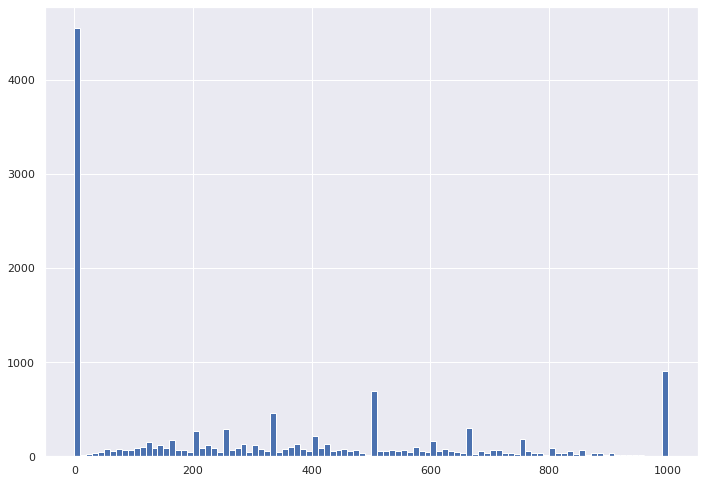

In [282]:
MrBoss['attraction_coeff'].hist(bins=100)

In [283]:
MrBoss.loc[(MrBoss['attraction_coeff']==0) & ((MrBoss['visit_days'] != '0') & (MrBoss['visit_days'] != 0))]

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
3,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
5,891083133,24,0,0.0,Spain,1,1,16,27,0,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
8,891085770,28,0,0.0,Italy,"1,2,3,4",1,25,31,1,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
10,891092496,27,0,0.0,Argentina,"1,2,4",1,19,32,0,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
19,892379415,27,0,0.0,Spain,"1,2,3,5",1,24,30,4,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13306,891696285,35,0,0.0,Switzerland,"1,3,4,5,6,7,8",1,30,38,3,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN
13313,891337575,31,0,0.0,Chile,"1,3,4,5,6,8",1,28,34,4,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN
13315,891092556,24,0,0.0,Argentina,"1,2",1,21,27,2,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN
13319,891332760,50,0,0.0,Chile,"2,4,5",1,47,53,3,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN


In [284]:
MrBoss.loc[(MrBoss['attraction_coeff']==0) & ((MrBoss['visit_days'] != '0') & (MrBoss['visit_days'] != 0))].groupby(('group'), as_index=False).agg({'uid':'nunique'})

,group,uid
0,control1,865
1,control2,860
2,test,860


<b>Не понятно почему у людей которые часто заходят в приложение привлекательность = 0, они ведут себя активно, но не получают каких-то положительных ответов от алгоритма приложения. Так как они равномерно распределены по группам, будем считать это фичей, удалять не будем.</b>

# После проверки датасета на наличие ошибок , дубликатов и пропуски , мы приступаем к следующим этапам .
# 1.Проверка репрезентативности
# 2.Исследование данных( на кого был направлен А/Б тест )
# 3.Проведем проверку на нормальность
# 4.Проведем А/А тест и сравним контрольные группы по 2 основным метрикам CR и ARPPU
# 5.Проводем А/Б тест
# 6.Вывод

# 1.Проведем проверку репрезентативности сравниваемых групп

In [285]:
MrBoss.groupby('group').agg({'uid':'nunique'})

,uid
group,
control1,4339
control2,4264
test,4308


<b>Так как в группах примерно одинаково пользователей, ниже будем смотреть на абсолютные числа, так как они будут максимально близки к долевым распределениям внутри данных.</b>

In [286]:
age_qustion = MrBoss.groupby(['group' ,'age']).agg({'uid':'nunique'}).reset_index()
age_qustion

,group,age,uid
0,control1,16,82
1,control1,17,22
2,control1,18,74
3,control1,19,93
4,control1,20,116
...,...,...,...
167,test,76,1
168,test,77,1
169,test,83,1
170,test,98,1


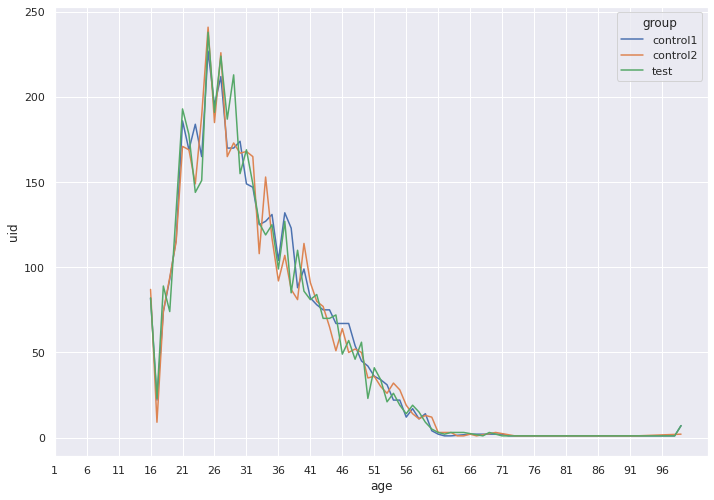

In [287]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()
# ax.set_xticks)
sns.lineplot(data=age_qustion, x="age", hue="group", y ='uid').set_xticks(range(1,101,5))

<b> Глянули поверхностно и очень приблизительно, кажется что данные не совсем равномерно распределены по возрастам</b>

In [288]:
age_qustion.loc[age_qustion['age']==17]

,group,age,uid
1,control1,17,22
57,control2,17,9
116,test,17,23


<b>Выше статистика как пример такого перекоса, видно, что очень мало молодых пользователей во второй группе. При этом в тестовой выборке также много молодых и тридцатилетних. Сделать с этими данными мы ничего не можем, так как опасно избавляться или приводить к общему знаменателю наши данные. В идеале бы перезапустить AB тест, с более правильным делением. Но тест шел год, так что с такой идеей нас просто пошлют)</b>

In [289]:
country_qustion = MrBoss.groupby(['group' ,'country']).agg({'uid':'nunique'}).reset_index()
country_qustion

,group,country,uid
0,control1,Algeria,2
1,control1,Argentina,389
2,control1,Armenia,1
3,control1,Australia,50
4,control1,Belgium,108
...,...,...,...
131,test,United Arab Emirates,226
132,test,United Kingdom (Great Britain),169
133,test,United States of America,1450
134,test,Uruguay,1


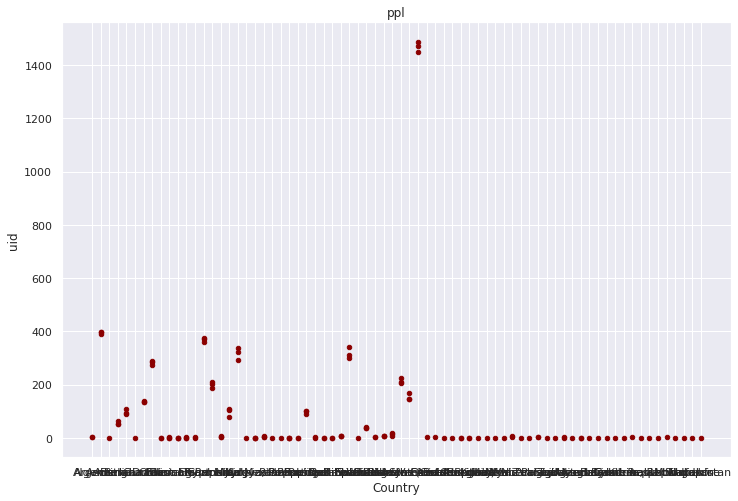

In [290]:
country_qustion.plot(kind='scatter', x = 'country', y='uid', figsize=(12, 8), color='darkred')
plt.title('ppl')
plt.xlabel('Country')
plt.ylabel('uid')
plt.show()

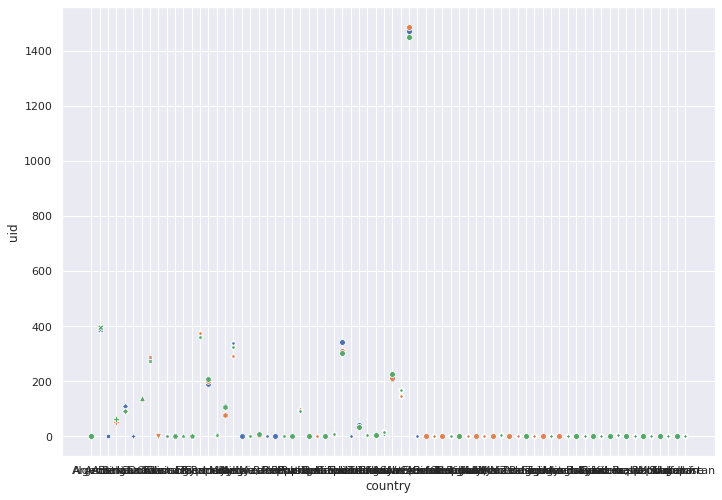

In [291]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()
# ax.set_xticks)
sns.lineplot(data=country_qustion, x="country", hue="group", y ='uid', markers=True, style="country", legend =False)


In [292]:
country_qustion.loc[country_qustion['country']=='Turkey']

,group,country,uid
34,control1,Turkey,8
78,control2,Turkey,5
129,test,Turkey,5


<b>График получился не особо читаемым, но тут история в том, что у нас точки на графике расположены очень близко друг к другу, это значит, что нет особо всплесков в пользователях из разных стран между группами</b>

In [293]:
gender_qustion = MrBoss.groupby(['group' ,'gender']).agg({'uid':'nunique'}).reset_index()
gender_qustion

,group,gender,uid
0,control1,0,182
1,control1,1,4157
2,control2,0,195
3,control2,1,4069
4,test,0,202
5,test,1,4106


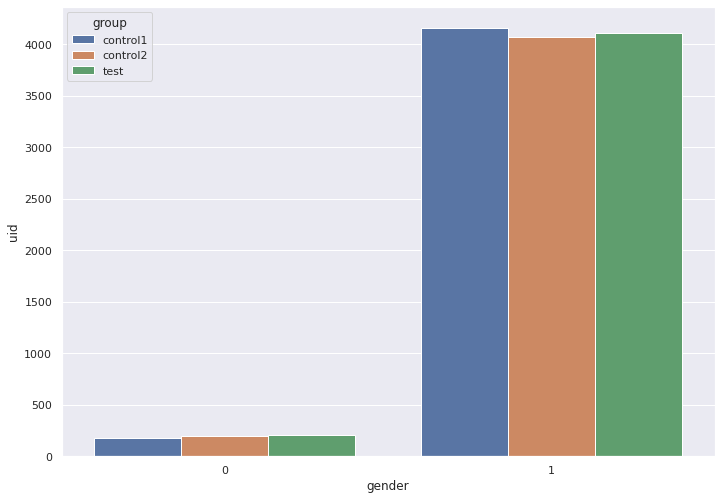

In [294]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()
# ax.set_xticks)
sns.barplot(data=gender_qustion, x="gender", hue="group", y ='uid')

In [295]:
print(country_qustion['uid'].sum())
country_qustion.sort_values('uid')

12911


,group,country,uid
67,control2,Nicaragua,1
84,control2,Uruguay,1
79,control2,Uganda,1
77,control2,Tajikistan,1
74,control2,Somalia,1
...,...,...,...
86,test,Argentina,396
40,control2,Argentina,397
133,test,United States of America,1450
38,control1,United States of America,1471


<b>Интересная выборка.Mужчин в целом по тиндерным приложениям всегда больше, но обычно в западных странах разрыв не настолько велик, он там +- около 70/30 или 80/20. Данные консистентны, хотя две контрольные выборки отличаются друг от друга больше чем</b>

<b>Вывод : Данные в целом репрезентативны, однако вопрос разного возраста внутри выборок может повлиять на выводы, которые мы получим из данных. Для справедливого анализа лучше было бы повторить тестирование с новым распределением пользователей, но это, скорее всего, будет очень дорого, поэтому будем смотреть на текущие данные</b>

# 2.Исследуем данные

In [296]:
# распределение пользователей по наличию премиум-статуса.
pd.crosstab(MrBoss.group, [MrBoss.is_premium, MrBoss.was_premium], margins=True)

is_premium     0.0       1.0    All
was_premium    0.0  1.0  1.0       
group                              
control1      3917  263  320   4500
control2      3856  236  308   4400
test          3902  258  268   4428
All          11675  757  896  13328

 <b>Распределение достаточно однородное, можно отметить, что в тестовой группе меньше людей, имеющих премиум-подписку.</b>

In [297]:
# Сколько пользователей имели или имеют сейчас премиум-статус в разбивке по типу продукта
pd.crosstab(MrBoss.product_type, [MrBoss.is_premium, MrBoss.was_premium], margins=True)

is_premium       0.0       1.0  All
was_premium      0.0  1.0  1.0     
product_type                       
coins             38   53  267  358
other_type        11   23   79  113
premium_no_trial   0   30  259  289
trial_premium      0    2  180  182
All               49  108  785  942

In [298]:
#В условии указано, что нововведение было применено для нескольких стран, чтобы определить эти страны, 
#сгруппируем их по группам и посмотрим, каких страны присутствуют во всех группах.
countries = pd.crosstab(MrBoss.country, MrBoss.group).reset_index()
countries

group,country,control1,control2,test
0,Algeria,2,0,2
1,Argentina,404,405,399
2,Armenia,1,0,0
3,Australia,50,52,62
4,Austria,0,4,0
...,...,...,...,...
67,United Kingdom (Great Britain),166,156,173
68,United States of America,1511,1527,1487
69,Uruguay,0,1,1
70,Uzbekistan,0,0,1


In [299]:
# А/В тест был направлен на пользователей из этих стран
abtest = countries[(countries.control1 > 0) & (countries.control2 > 0) & (countries.test > 0)]
abtest

group,country,control1,control2,test
1,Argentina,404,405,399
3,Australia,50,52,62
7,Belgium,108,94,94
11,Canada,139,136,142
12,Chile,292,294,280
14,Colombia,1,2,1
15,Costa Rica,1,1,1
17,Dominican Republic,2,1,1
19,France,385,380,380
22,Germany,190,204,210


# Oставим только нужные страны в датафреймах

In [300]:
new_users = users.merge(abtest, how='inner',on='country').drop(columns=['control1', 'control2', 'test'])
MrBoss2 = MrBoss.merge(abtest, how='inner', on='country').drop(columns=['control1', 'control2', 'test'])
MrBoss2

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,892309896,27,685,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
1,892130292,32,0,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
2,891219699,30,1000,0.0,United States of America,0,1,27,33,1,1.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
3,892172469,26,600,0.0,United States of America,1,1,23,29,5,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
4,891832515,20,0,0.0,United States of America,0,1,17,23,1,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13234,892347786,29,1000,0.0,Dominican Republic,19,1,26,32,1,0.0,0.0,0,control1,NaT,NaT,NaN,NaN,NaN,NaN
13235,891174615,29,0,0.0,Dominican Republic,"1,2,3,4,5,6",1,26,32,2,0.0,0.0,0,control2,NaT,NaT,NaN,NaN,NaN,NaN
13236,891079041,29,1000,0.0,Costa Rica,"1,2,3,4,5",1,16,36,3,0.0,0.0,0,test,NaT,NaT,NaN,NaN,NaN,NaN
13237,892305441,31,750,0.0,Costa Rica,"1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,2...",1,28,34,12,0.0,0.0,0,control1,NaT,NaT,NaN,NaN,NaN,NaN


In [301]:
# Распределение выручки по странам 
country = MrBoss2\
    .groupby('country', as_index=False)\
    .agg({'uid': 'nunique', 'revenue': 'sum'})\
    .sort_values('revenue', ascending=False)
country.head(10)

,country,uid,revenue
24,United States of America,4407,2015923.0
12,Italy,954,768586.0
8,France,1105,628602.0
18,Spain,953,578266.0
0,Argentina,1182,452465.0
22,United Arab Emirates,644,406471.0
23,United Kingdom (Great Britain),461,372814.0
4,Chile,845,276120.0
11,Israel,293,275821.0
2,Belgium,290,218530.0


# По условию задачи , нам необхождимо не только найти страны на которые был направлен А/Б тест но и так же пользователей с премиум статусом для которых была изменена стоимость и метод оплаты через две новые платежные системы

In [302]:
MrBoss2 = MrBoss2.query('product_type == "premium_no_trial"') # Отобрали нужных пользователей у которых продукт премиум

In [303]:
# А/В-тест был проведен с 2017-01-11 03:07:00 по 2017-12-11 23:28:00

In [304]:
MrBoss2.joined_at.min() # Диапозон входит

Timestamp('2017-01-11 03:07:00')

In [305]:
MrBoss2.joined_at.max() # Диапозон входит

Timestamp('2017-10-31 23:40:00')

In [306]:
# Кол-во пользователей 
MrBoss2 = MrBoss2.query('is_premium == 1.0') # Отобрали тех пользователей у которые имеется премиум действующий
MrBoss2.shape

(257, 20)

<b> Наши пользователи = 257 </b>

In [307]:
# Попробуем найти две новые платежные системы по условиям задачи.Нaчнем с колонки "from_page"

In [308]:
payment_system_test = MrBoss2.query('group == "test"')
payment_system_control1 = MrBoss2.query('group == "control1"')
payment_system_control2 = MrBoss2.query('group == "control2"')

In [309]:
payment_system_test.from_page.value_counts()

autoreply_message      20
promo_09               14
none                   10
popular_users_chat      8
left_sidebar_menu       6
dating                  4
fans                    2
popular_users_block     2
send_message            1
delivery_vip            1
Name: from_page, dtype: int64

In [310]:
payment_system_control1.from_page.value_counts()

autoreply_message      24
promo_09               21
left_sidebar_menu      15
none                   10
popular_users_block     8
popular_users_chat      4
dating                  4
user_profile            3
no_sympathy             2
fans                    1
send_message            1
Name: from_page, dtype: int64

In [311]:
payment_system_control2.from_page.value_counts()

autoreply_message      21
promo_09               21
left_sidebar_menu      21
none                   11
dating                  8
popular_users_block     8
send_message            3
popular_users_chat      1
fans                    1
user_profile            1
Name: from_page, dtype: int64

<b> Изначально по условию , колонка from_page обозначает то, с какой страницы был перенаправлен пользователей на платежную систему. Я ее исследовал с целью того , чтобы сравнить данные в тестовой и контрольной группе , возможно в тестовой затерялась бы строка с названием платежный системы , но увы я не вижу этого

In [312]:
# Посмотрим на колонку payment_id

In [313]:
pay_test = MrBoss2.query('group == "test"')
pay_control1 = MrBoss2.query('group == "control1"')
pay_control2 = MrBoss2.query('group == "control2"')

In [314]:
pay_test.payment_id.value_counts()

147.0    59
68.0      8
0.0       1
Name: payment_id, dtype: int64

In [315]:
pay_control1.payment_id.value_counts()

147.0    86
68.0      5
0.0       2
Name: payment_id, dtype: int64

In [316]:
pay_control2.payment_id.value_counts()

147.0    88
68.0      7
0.0       1
Name: payment_id, dtype: int64

<b> Посмотрев на колонку payment_id мы видим то , что в тестовой и контрольной группе одинаковые id оплаты . Я проверил эту колонку с целью найти данные о платежной системе ( код платежный системы или хоть какие-то подсказки ) , но увы , данной информации я не вижу

<b> Выводы

1.Распределение пользователей по наличию премиум-статуса достаточно однородное, причем отсутствуют пользователи, у кого премиум есть сейчас, а раньше не было
    
2.При исследовании распределения пользователей в зависимости от типа продукта, обнаружились люди, у которых не было премиум-статуса, но указана подписка за внутреннюю валюту ("coins" - 38 записей). У всех премиум-пользователей (и те, кто был, и кто есть сейчас) наибольшей популярностью пользуется подписка за внутреннюю валюту ("coins").
    
3.Распределение выручки по странам показало, что не всегда страны с наибольшим количеством пользователей приносят наибольший доход.
    
4.Проверив данные об оплате , могу сделать вывод о том , что команда аналитиков забыла выгрузить в данные колонку об информации по платежным системам

# 3.Необходимо проверить на нормальность наши группы 

### Контрольная №1

In [317]:
normal_control = MrBoss2.query('group == "control1"')
normal_control

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
1523,892380033,29,535,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,25,31,142,1.0,1.0,4732,control1,2017-10-15 09:11:00,2017-10-15 09:23:00,4732.0,147.0,left_sidebar_menu,premium_no_trial
1555,891264903,19,239,0.0,United States of America,"2,3,4,5,6,7,8,9",1,16,22,46,1.0,1.0,7761,control1,2017-06-11 16:02:00,2017-08-11 22:32:00,3887.0,147.0,none,premium_no_trial
1556,891264903,19,239,0.0,United States of America,"2,3,4,5,6,7,8,9",1,16,22,46,1.0,1.0,7761,control1,2017-06-11 16:02:00,2017-09-11 10:32:00,3874.0,147.0,none,premium_no_trial
1587,892421277,22,446,62.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,16,35,130,1.0,1.0,60333,control1,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial
1664,891288783,38,529,28.0,United States of America,"1,2,3,4",1,35,41,34,1.0,1.0,12597,control1,2017-06-11 06:09:00,2017-06-11 07:47:00,6292.0,147.0,dating,premium_no_trial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,891383310,22,1000,0.0,Turkey,1,1,19,83,4,1.0,1.0,63037,control1,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial
13175,891693753,24,311,50.0,Turkey,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,18,40,478,1.0,1.0,13026,control1,2017-10-29 15:24:00,2017-06-11 22:30:00,3432.0,147.0,promo_09,premium_no_trial
13180,892344951,20,232,0.0,Turkey,"1,2,3,4,5,6,7",1,17,23,73,1.0,1.0,3614,control1,2017-10-15 21:37:00,2017-10-15 21:40:00,3614.0,147.0,autoreply_message,premium_no_trial
13215,891716358,25,935,0.0,India,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17",1,22,28,171,1.0,1.0,4914,control1,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial


In [318]:
stat, p = ss.normaltest(normal_control['uid']) # Критерий согласия Пирсона
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Отклонить гипотезу о нормальности


<b>В контрольной группе 1 значение p-value < 0.05 поэтому мы отклоняем  гипотезу</b>

### Контрольная №2


In [319]:
normal_control_2 = MrBoss2.query('group == "control2"')
normal_control_2

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
3057,891291573,37,382,0.0,United States of America,"1,2,3",0,34,40,471,1.0,1.0,6292,control2,2017-06-11 04:33:00,2017-09-11 05:55:00,6292.0,147.0,left_sidebar_menu,premium_no_trial
3098,892064328,55,372,68.0,United States of America,"1,2,3,4,5",1,52,58,212,1.0,1.0,18902,control2,2017-10-21 20:54:00,2017-10-21 23:00:00,6292.0,147.0,autoreply_message,premium_no_trial
3177,892011144,33,361,6.0,United States of America,0,1,50,59,36,1.0,1.0,7553,control2,2017-10-22 22:18:00,2017-10-22 22:27:00,6292.0,147.0,autoreply_message,premium_no_trial
3191,891854379,27,342,0.0,United States of America,"1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20",1,24,30,35,1.0,1.0,4537,control2,2017-10-26 08:30:00,2017-10-26 09:42:00,4537.0,147.0,popular_users_block,premium_no_trial
3298,891112263,23,404,20.0,United States of America,"1,2,3,4,5,6",1,20,27,89,1.0,1.0,17290,control2,2017-09-11 15:59:00,2017-11-11 14:55:00,4680.0,147.0,popular_users_chat,premium_no_trial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476,892157331,31,0,4.0,United Arab Emirates,"1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,23,26,27",1,28,34,0,1.0,1.0,9516,control2,2017-10-19 21:42:00,2017-10-19 21:46:00,4914.0,147.0,left_sidebar_menu,premium_no_trial
13021,891995541,99,213,0.0,Ukraine,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,18,99,197,1.0,1.0,8879,control2,2017-10-23 08:05:00,2017-10-23 10:02:00,6357.0,147.0,left_sidebar_menu,premium_no_trial
13115,891592941,38,112,4.0,Switzerland,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,35,41,62,1.0,1.0,10192,control2,2017-10-31 12:40:00,2017-03-11 16:25:00,6292.0,147.0,promo_09,premium_no_trial
13128,892364742,30,0,0.0,Switzerland,0,1,27,33,7,1.0,1.0,4797,control2,2017-10-15 15:38:00,2017-10-15 16:00:00,4797.0,147.0,autoreply_message,premium_no_trial


In [320]:
stat, p = ss.normaltest(normal_control_2['uid']) # Критерий согласия Пирсона
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Отклонить гипотезу о нормальности


<b>В контрольной группе 2 значение p-value < 0.05 поэтому мы отклоняем гипотезу</b>

### Тестовая

In [321]:
normal_test = MrBoss2.query('group == "test"')
normal_test

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,joined_at,paid_at,revenue,payment_id,from_page,product_type
135,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,test,2017-10-18 01:09:00,2017-10-18 01:15:00,6292.0,147.0,left_sidebar_menu,premium_no_trial
192,891499695,42,850,0.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,19,37,808,1.0,1.0,9698,test,2017-02-11 14:14:00,2017-11-11 20:13:00,9698.0,147.0,dating,premium_no_trial
283,892186941,44,552,88.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,41,47,38,1.0,1.0,25207,test,2017-10-19 05:48:00,2017-10-19 06:34:00,12597.0,147.0,dating,premium_no_trial
378,891222282,41,476,16.0,United States of America,"1,2,7,8",1,38,44,86,1.0,1.0,12597,test,2017-07-11 09:26:00,2017-07-11 09:38:00,6292.0,147.0,autoreply_message,premium_no_trial
411,892354869,23,583,0.0,United States of America,0,1,20,26,12,1.0,1.0,7956,test,2017-10-15 18:50:00,2017-10-15 18:52:00,7956.0,147.0,autoreply_message,premium_no_trial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12598,891907887,27,250,0.0,Canada,"1,2,3,5,6",1,24,30,4,1.0,1.0,4706,test,2017-10-25 02:58:00,2017-10-25 03:05:00,4706.0,147.0,left_sidebar_menu,premium_no_trial
12644,891448377,51,605,0.0,Canada,"3,4,5,6,7,9,10,11,12",1,16,74,195,1.0,1.0,12597,test,2017-03-11 16:33:00,2017-03-11 16:46:00,12597.0,147.0,dating,premium_no_trial
12684,891861048,35,319,6.0,Canada,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,1.0,1.0,21359,test,2017-10-26 02:55:00,2017-10-11 19:00:00,3588.0,68.0,none,premium_no_trial
12687,891861048,35,319,6.0,Canada,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,1.0,1.0,21359,test,2017-10-26 02:55:00,2017-10-26 03:00:00,3588.0,68.0,none,premium_no_trial


In [322]:
stat, p = ss.normaltest(normal_test['uid']) # Критерий согласия Пирсона
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Отклонить гипотезу о нормальности


<b>В тестовой группе значение p-value < 0.05 поэтому мы отклоняем  гипотезу</b>

# Рассчитаем RETENTION

In [323]:
MrBoss2['visit_days'] = MrBoss2['visit_days'].astype('string')
MrBoss2['visit_days']=MrBoss2['visit_days'].apply(lambda x: x.split(','))

In [324]:
MrBoss2['R7'] = MrBoss2['visit_days'].apply(lambda x: '7' in x)
MrBoss2['R14'] = MrBoss2['visit_days'].apply(lambda x: '14' in x)
MrBoss2['R30'] = MrBoss2['visit_days'].apply(lambda x: '30' in x)

In [325]:
retention =  MrBoss2.groupby('group').agg({'uid':'nunique',
                                            'R7':'sum',
                                            'R14':'sum',
                                            'R30':'sum'
                                        })

In [326]:
retention['retention7'] = retention['R7'] / retention['uid']
retention['retention14'] = retention['R14'] / retention['uid']
retention['retention30'] = retention['R30'] / retention['uid']
retention

,uid,R7,R14,R30,retention7,retention14,retention30
group,,,,,,,
control1,87,56,30,2,0.643678,0.344828,0.022989
control2,91,61,43,0,0.670330,0.472527,0.000000
test,59,46,30,6,0.779661,0.508475,0.101695


<b>По Retention у нас данные выглядят уже не так страшно. Получается весь вопрос в структуре данных в платежеспособности аудитории.</b>

# 4.Проведем А/А тест. Мы не должны получить статистически значимых различий

### Нулевая гипотеза: Oднородны.
### Альтернативная гипотеза: Hеоднородны

### Сравним по ARPPU

In [327]:
just_control = MrBoss2.query('group != "test"')
just_control

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,group,joined_at,paid_at,revenue,payment_id,from_page,product_type,R7,R14,R30
1523,892380033,29,535,0.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,25,31,142,...,control1,2017-10-15 09:11:00,2017-10-15 09:23:00,4732.0,147.0,left_sidebar_menu,premium_no_trial,True,True,True
1555,891264903,19,239,0.0,United States of America,"[2, 3, 4, 5, 6, 7, 8, 9]",1,16,22,46,...,control1,2017-06-11 16:02:00,2017-08-11 22:32:00,3887.0,147.0,none,premium_no_trial,True,False,False
1556,891264903,19,239,0.0,United States of America,"[2, 3, 4, 5, 6, 7, 8, 9]",1,16,22,46,...,control1,2017-06-11 16:02:00,2017-09-11 10:32:00,3874.0,147.0,none,premium_no_trial,True,False,False
1587,892421277,22,446,62.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,16,35,130,...,control1,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial,True,True,True
1664,891288783,38,529,28.0,United States of America,"[1, 2, 3, 4]",1,35,41,34,...,control1,2017-06-11 06:09:00,2017-06-11 07:47:00,6292.0,147.0,dating,premium_no_trial,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,891383310,22,1000,0.0,Turkey,[1],1,19,83,4,...,control1,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial,False,False,False
13175,891693753,24,311,50.0,Turkey,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,18,40,478,...,control1,2017-10-29 15:24:00,2017-06-11 22:30:00,3432.0,147.0,promo_09,premium_no_trial,True,True,False
13180,892344951,20,232,0.0,Turkey,"[1, 2, 3, 4, 5, 6, 7]",1,17,23,73,...,control1,2017-10-15 21:37:00,2017-10-15 21:40:00,3614.0,147.0,autoreply_message,premium_no_trial,True,False,False
13215,891716358,25,935,0.0,India,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,22,28,171,...,control1,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial,True,True,False


In [328]:
# проверка равенства дисперсий
pg.homoscedasticity(data=just_control, dv="revenue", group="group")

,W,pval,equal_var
levene,0.258748,0.611581,True


In [329]:
just_control['arppu'] = just_control['revenue'] / just_control['uid']
just_control

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,joined_at,paid_at,revenue,payment_id,from_page,product_type,R7,R14,R30,arppu
1523,892380033,29,535,0.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,25,31,142,...,2017-10-15 09:11:00,2017-10-15 09:23:00,4732.0,147.0,left_sidebar_menu,premium_no_trial,True,True,True,0.000005
1555,891264903,19,239,0.0,United States of America,"[2, 3, 4, 5, 6, 7, 8, 9]",1,16,22,46,...,2017-06-11 16:02:00,2017-08-11 22:32:00,3887.0,147.0,none,premium_no_trial,True,False,False,0.000004
1556,891264903,19,239,0.0,United States of America,"[2, 3, 4, 5, 6, 7, 8, 9]",1,16,22,46,...,2017-06-11 16:02:00,2017-09-11 10:32:00,3874.0,147.0,none,premium_no_trial,True,False,False,0.000004
1587,892421277,22,446,62.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,16,35,130,...,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial,True,True,True,0.000053
1664,891288783,38,529,28.0,United States of America,"[1, 2, 3, 4]",1,35,41,34,...,2017-06-11 06:09:00,2017-06-11 07:47:00,6292.0,147.0,dating,premium_no_trial,False,False,False,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,891383310,22,1000,0.0,Turkey,[1],1,19,83,4,...,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial,False,False,False,0.000071
13175,891693753,24,311,50.0,Turkey,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,18,40,478,...,2017-10-29 15:24:00,2017-06-11 22:30:00,3432.0,147.0,promo_09,premium_no_trial,True,True,False,0.000004
13180,892344951,20,232,0.0,Turkey,"[1, 2, 3, 4, 5, 6, 7]",1,17,23,73,...,2017-10-15 21:37:00,2017-10-15 21:40:00,3614.0,147.0,autoreply_message,premium_no_trial,True,False,False,0.000004
13215,891716358,25,935,0.0,India,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,22,28,171,...,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial,True,True,False,0.000006


In [330]:
just_control.groupby('group', as_index=False)\
            .agg({'arppu': 'mean'})

,group,arppu
0,control1,0.000009
1,control2,0.000008


In [331]:
good = just_control.query('group == "control1"')
bad = just_control.query('group == "control2"')


In [332]:
ss.ttest_ind(good['arppu'],bad['arppu'])

Ttest_indResult(statistic=0.4272328009020224, pvalue=0.6697012905995419)

# Сравним по CR

In [333]:
just_control

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,joined_at,paid_at,revenue,payment_id,from_page,product_type,R7,R14,R30,arppu
1523,892380033,29,535,0.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,25,31,142,...,2017-10-15 09:11:00,2017-10-15 09:23:00,4732.0,147.0,left_sidebar_menu,premium_no_trial,True,True,True,0.000005
1555,891264903,19,239,0.0,United States of America,"[2, 3, 4, 5, 6, 7, 8, 9]",1,16,22,46,...,2017-06-11 16:02:00,2017-08-11 22:32:00,3887.0,147.0,none,premium_no_trial,True,False,False,0.000004
1556,891264903,19,239,0.0,United States of America,"[2, 3, 4, 5, 6, 7, 8, 9]",1,16,22,46,...,2017-06-11 16:02:00,2017-09-11 10:32:00,3874.0,147.0,none,premium_no_trial,True,False,False,0.000004
1587,892421277,22,446,62.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,16,35,130,...,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial,True,True,True,0.000053
1664,891288783,38,529,28.0,United States of America,"[1, 2, 3, 4]",1,35,41,34,...,2017-06-11 06:09:00,2017-06-11 07:47:00,6292.0,147.0,dating,premium_no_trial,False,False,False,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,891383310,22,1000,0.0,Turkey,[1],1,19,83,4,...,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial,False,False,False,0.000071
13175,891693753,24,311,50.0,Turkey,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,18,40,478,...,2017-10-29 15:24:00,2017-06-11 22:30:00,3432.0,147.0,promo_09,premium_no_trial,True,True,False,0.000004
13180,892344951,20,232,0.0,Turkey,"[1, 2, 3, 4, 5, 6, 7]",1,17,23,73,...,2017-10-15 21:37:00,2017-10-15 21:40:00,3614.0,147.0,autoreply_message,premium_no_trial,True,False,False,0.000004
13215,891716358,25,935,0.0,India,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,22,28,171,...,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial,True,True,False,0.000006


In [334]:
cr1 = (just_control.query('group == "control1"').is_premium.sum() 
        / MrBoss.query('group == "control1"').uid.nunique()) * 100
cr2 = (just_control.query('group == "control2"').is_premium.sum() 
        / MrBoss.query('group == "control2"').uid.nunique()) * 100
print(cr1)
print(cr2)

2.1433510025351463
2.25140712945591


<b> Значения практически равны

In [335]:
#Проверим на стат значимость с помощью ХИ-квадрата
stat, p, dof, xi = chi2_contingency(pd.crosstab(just_control.group, just_control.is_premium))
if p <= 0.05:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не отклоняем нулевую гипотезу')

Не отклоняем нулевую гипотезу


<b>Выводы : А/А-тест не выявил статистически значимых различий  между группами 1 и 2. Они однородны. Оставляем нулевую гипотезу, можно объединить контрольные группы в одну и проверять результаты А/Б-теста.</b>

# Сделаем общую контрольную группу 

In [336]:
MrBoss3 = MrBoss2.replace(['control1', 'control2'], 'control')
MrBoss3

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,group,joined_at,paid_at,revenue,payment_id,from_page,product_type,R7,R14,R30
135,892236423,23,262,378.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,19,23,1326,...,test,2017-10-18 01:09:00,2017-10-18 01:15:00,6292.0,147.0,left_sidebar_menu,premium_no_trial,True,True,False
192,891499695,42,850,0.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,19,37,808,...,test,2017-02-11 14:14:00,2017-11-11 20:13:00,9698.0,147.0,dating,premium_no_trial,True,False,False
283,892186941,44,552,88.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,41,47,38,...,test,2017-10-19 05:48:00,2017-10-19 06:34:00,12597.0,147.0,dating,premium_no_trial,True,True,False
378,891222282,41,476,16.0,United States of America,"[1, 2, 7, 8]",1,38,44,86,...,test,2017-07-11 09:26:00,2017-07-11 09:38:00,6292.0,147.0,autoreply_message,premium_no_trial,True,False,False
411,892354869,23,583,0.0,United States of America,[0],1,20,26,12,...,test,2017-10-15 18:50:00,2017-10-15 18:52:00,7956.0,147.0,autoreply_message,premium_no_trial,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,891383310,22,1000,0.0,Turkey,[1],1,19,83,4,...,control,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial,False,False,False
13175,891693753,24,311,50.0,Turkey,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,18,40,478,...,control,2017-10-29 15:24:00,2017-06-11 22:30:00,3432.0,147.0,promo_09,premium_no_trial,True,True,False
13180,892344951,20,232,0.0,Turkey,"[1, 2, 3, 4, 5, 6, 7]",1,17,23,73,...,control,2017-10-15 21:37:00,2017-10-15 21:40:00,3614.0,147.0,autoreply_message,premium_no_trial,True,False,False
13215,891716358,25,935,0.0,India,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,22,28,171,...,control,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial,True,True,False


# 5.Можем проводить А/Б тест

In [337]:
MrBoss3

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,group,joined_at,paid_at,revenue,payment_id,from_page,product_type,R7,R14,R30
135,892236423,23,262,378.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,19,23,1326,...,test,2017-10-18 01:09:00,2017-10-18 01:15:00,6292.0,147.0,left_sidebar_menu,premium_no_trial,True,True,False
192,891499695,42,850,0.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,19,37,808,...,test,2017-02-11 14:14:00,2017-11-11 20:13:00,9698.0,147.0,dating,premium_no_trial,True,False,False
283,892186941,44,552,88.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,41,47,38,...,test,2017-10-19 05:48:00,2017-10-19 06:34:00,12597.0,147.0,dating,premium_no_trial,True,True,False
378,891222282,41,476,16.0,United States of America,"[1, 2, 7, 8]",1,38,44,86,...,test,2017-07-11 09:26:00,2017-07-11 09:38:00,6292.0,147.0,autoreply_message,premium_no_trial,True,False,False
411,892354869,23,583,0.0,United States of America,[0],1,20,26,12,...,test,2017-10-15 18:50:00,2017-10-15 18:52:00,7956.0,147.0,autoreply_message,premium_no_trial,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,891383310,22,1000,0.0,Turkey,[1],1,19,83,4,...,control,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial,False,False,False
13175,891693753,24,311,50.0,Turkey,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,18,40,478,...,control,2017-10-29 15:24:00,2017-06-11 22:30:00,3432.0,147.0,promo_09,premium_no_trial,True,True,False
13180,892344951,20,232,0.0,Turkey,"[1, 2, 3, 4, 5, 6, 7]",1,17,23,73,...,control,2017-10-15 21:37:00,2017-10-15 21:40:00,3614.0,147.0,autoreply_message,premium_no_trial,True,False,False
13215,891716358,25,935,0.0,India,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,22,28,171,...,control,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial,True,True,False


In [338]:
MrBoss3['arppu'] = MrBoss3['revenue'] / MrBoss3['uid']
MrBoss3

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,...,joined_at,paid_at,revenue,payment_id,from_page,product_type,R7,R14,R30,arppu
135,892236423,23,262,378.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,19,23,1326,...,2017-10-18 01:09:00,2017-10-18 01:15:00,6292.0,147.0,left_sidebar_menu,premium_no_trial,True,True,False,0.000007
192,891499695,42,850,0.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",1,19,37,808,...,2017-02-11 14:14:00,2017-11-11 20:13:00,9698.0,147.0,dating,premium_no_trial,True,False,False,0.000011
283,892186941,44,552,88.0,United States of America,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,41,47,38,...,2017-10-19 05:48:00,2017-10-19 06:34:00,12597.0,147.0,dating,premium_no_trial,True,True,False,0.000014
378,891222282,41,476,16.0,United States of America,"[1, 2, 7, 8]",1,38,44,86,...,2017-07-11 09:26:00,2017-07-11 09:38:00,6292.0,147.0,autoreply_message,premium_no_trial,True,False,False,0.000007
411,892354869,23,583,0.0,United States of America,[0],1,20,26,12,...,2017-10-15 18:50:00,2017-10-15 18:52:00,7956.0,147.0,autoreply_message,premium_no_trial,False,False,False,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,891383310,22,1000,0.0,Turkey,[1],1,19,83,4,...,2017-04-11 20:47:00,2017-04-11 22:17:00,63037.0,147.0,autoreply_message,premium_no_trial,False,False,False,0.000071
13175,891693753,24,311,50.0,Turkey,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,18,40,478,...,2017-10-29 15:24:00,2017-06-11 22:30:00,3432.0,147.0,promo_09,premium_no_trial,True,True,False,0.000004
13180,892344951,20,232,0.0,Turkey,"[1, 2, 3, 4, 5, 6, 7]",1,17,23,73,...,2017-10-15 21:37:00,2017-10-15 21:40:00,3614.0,147.0,autoreply_message,premium_no_trial,True,False,False,0.000004
13215,891716358,25,935,0.0,India,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,22,28,171,...,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial,True,True,False,0.000006


# ARPPU

In [339]:
c = MrBoss3.query('group =="control"')
a = MrBoss3.query('group =="test"')

In [340]:
# проверка равенства дисперсий
pg.homoscedasticity(data=MrBoss3, dv="revenue", group="group")

,W,pval,equal_var
levene,2.551433,0.111433,True


In [341]:
ss.ttest_ind(c['arppu'],a['arppu'])

Ttest_indResult(statistic=-1.850490545518731, pvalue=0.06539946609070867)

# CR

In [352]:
MrBoss4 = MrBoss.replace(['control1', 'control2'], 'control')

In [356]:
cr_control = (MrBoss3.query('group == "control"').is_premium.sum() 
             / MrBoss4.query("group == 'control'").uid.nunique()) * 100
cr_test = (MrBoss3.query('group == "test"').is_premium.sum() 
          / MrBoss4.query('group == "test"').uid.nunique()) * 100
print(f"CR в контрольной группе: {cr_control.round(2)}\n"
      f"CR в тестовой группе: {cr_test.round(2)}")

CR в контрольной группе: 2.2
CR в тестовой группе: 1.58


In [375]:
#Проверим на стат значимость с помощью ХИ-квадрата
stat, p, dof, xi = chi2_contingency(pd.crosstab(MrBoss4.group, MrBoss4.is_premium))
if p <= 0.05:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не отклоняем нулевую гипотезу')

Отклоняем нулевую гипотезу


# 6.Вывод:

<b>Проведя А/Б тест , можно сделать вывод , то что А/Б тест был неуспешен. Нулевая гипотеза не была отвержена , что сведетельствует о том , что изменение стоимости премиум подписки не увеличила нашу прибыль , но так же мы можем видеть, что конверсия в покупку премиум-статуса и вовсе снизилась статистически значимо
    
P.S. Так же хочется отметить , что данные не совсем консистентные и к выводам нужно относится осторожно. Молодые условно больше ищут отношений , но денег у них меньше. При этом выше конкуренция</b>